In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive")
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Load data from Excel file
data_path1 = '/content/gdrive/MyDrive/FYDP-2_DATA&Code/Copy of ACLED Data.xlsx'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


   YEAR  TIME_PRECISION EVENT_TYPE   LOCATION  LATITUDE  LONGITUDE  \
0  2001               1    Battles   Lohagara   23.1998    89.6644   
1  2001               1      Riots  Hathazari   22.5052    91.8134   
2  2001               1      Riots  Rangamati   22.6432    92.1919   
3  2001               1      Riots     Rajoir   23.1878    90.0322   
4  2001               1      Riots   Rajshahi   24.3740    88.6011   

   FATALITIES  WRapeIncident  WRapeDeath  BD_GDP  BD_GDP_GR  \
0           1            183         135     415      -0.73   
1           0            183         135     415      -0.73   
2           0            183         135     415      -0.73   
3           0            183         135     415      -0.73   
4           0            183         135     415      -0.73   

   ChildrenMortalityRate  AvgPopulationdensity  
0                   60.3           2307557.908  
1                   60.3           2307557.908  
2                   60.3           2307557.908  
3   

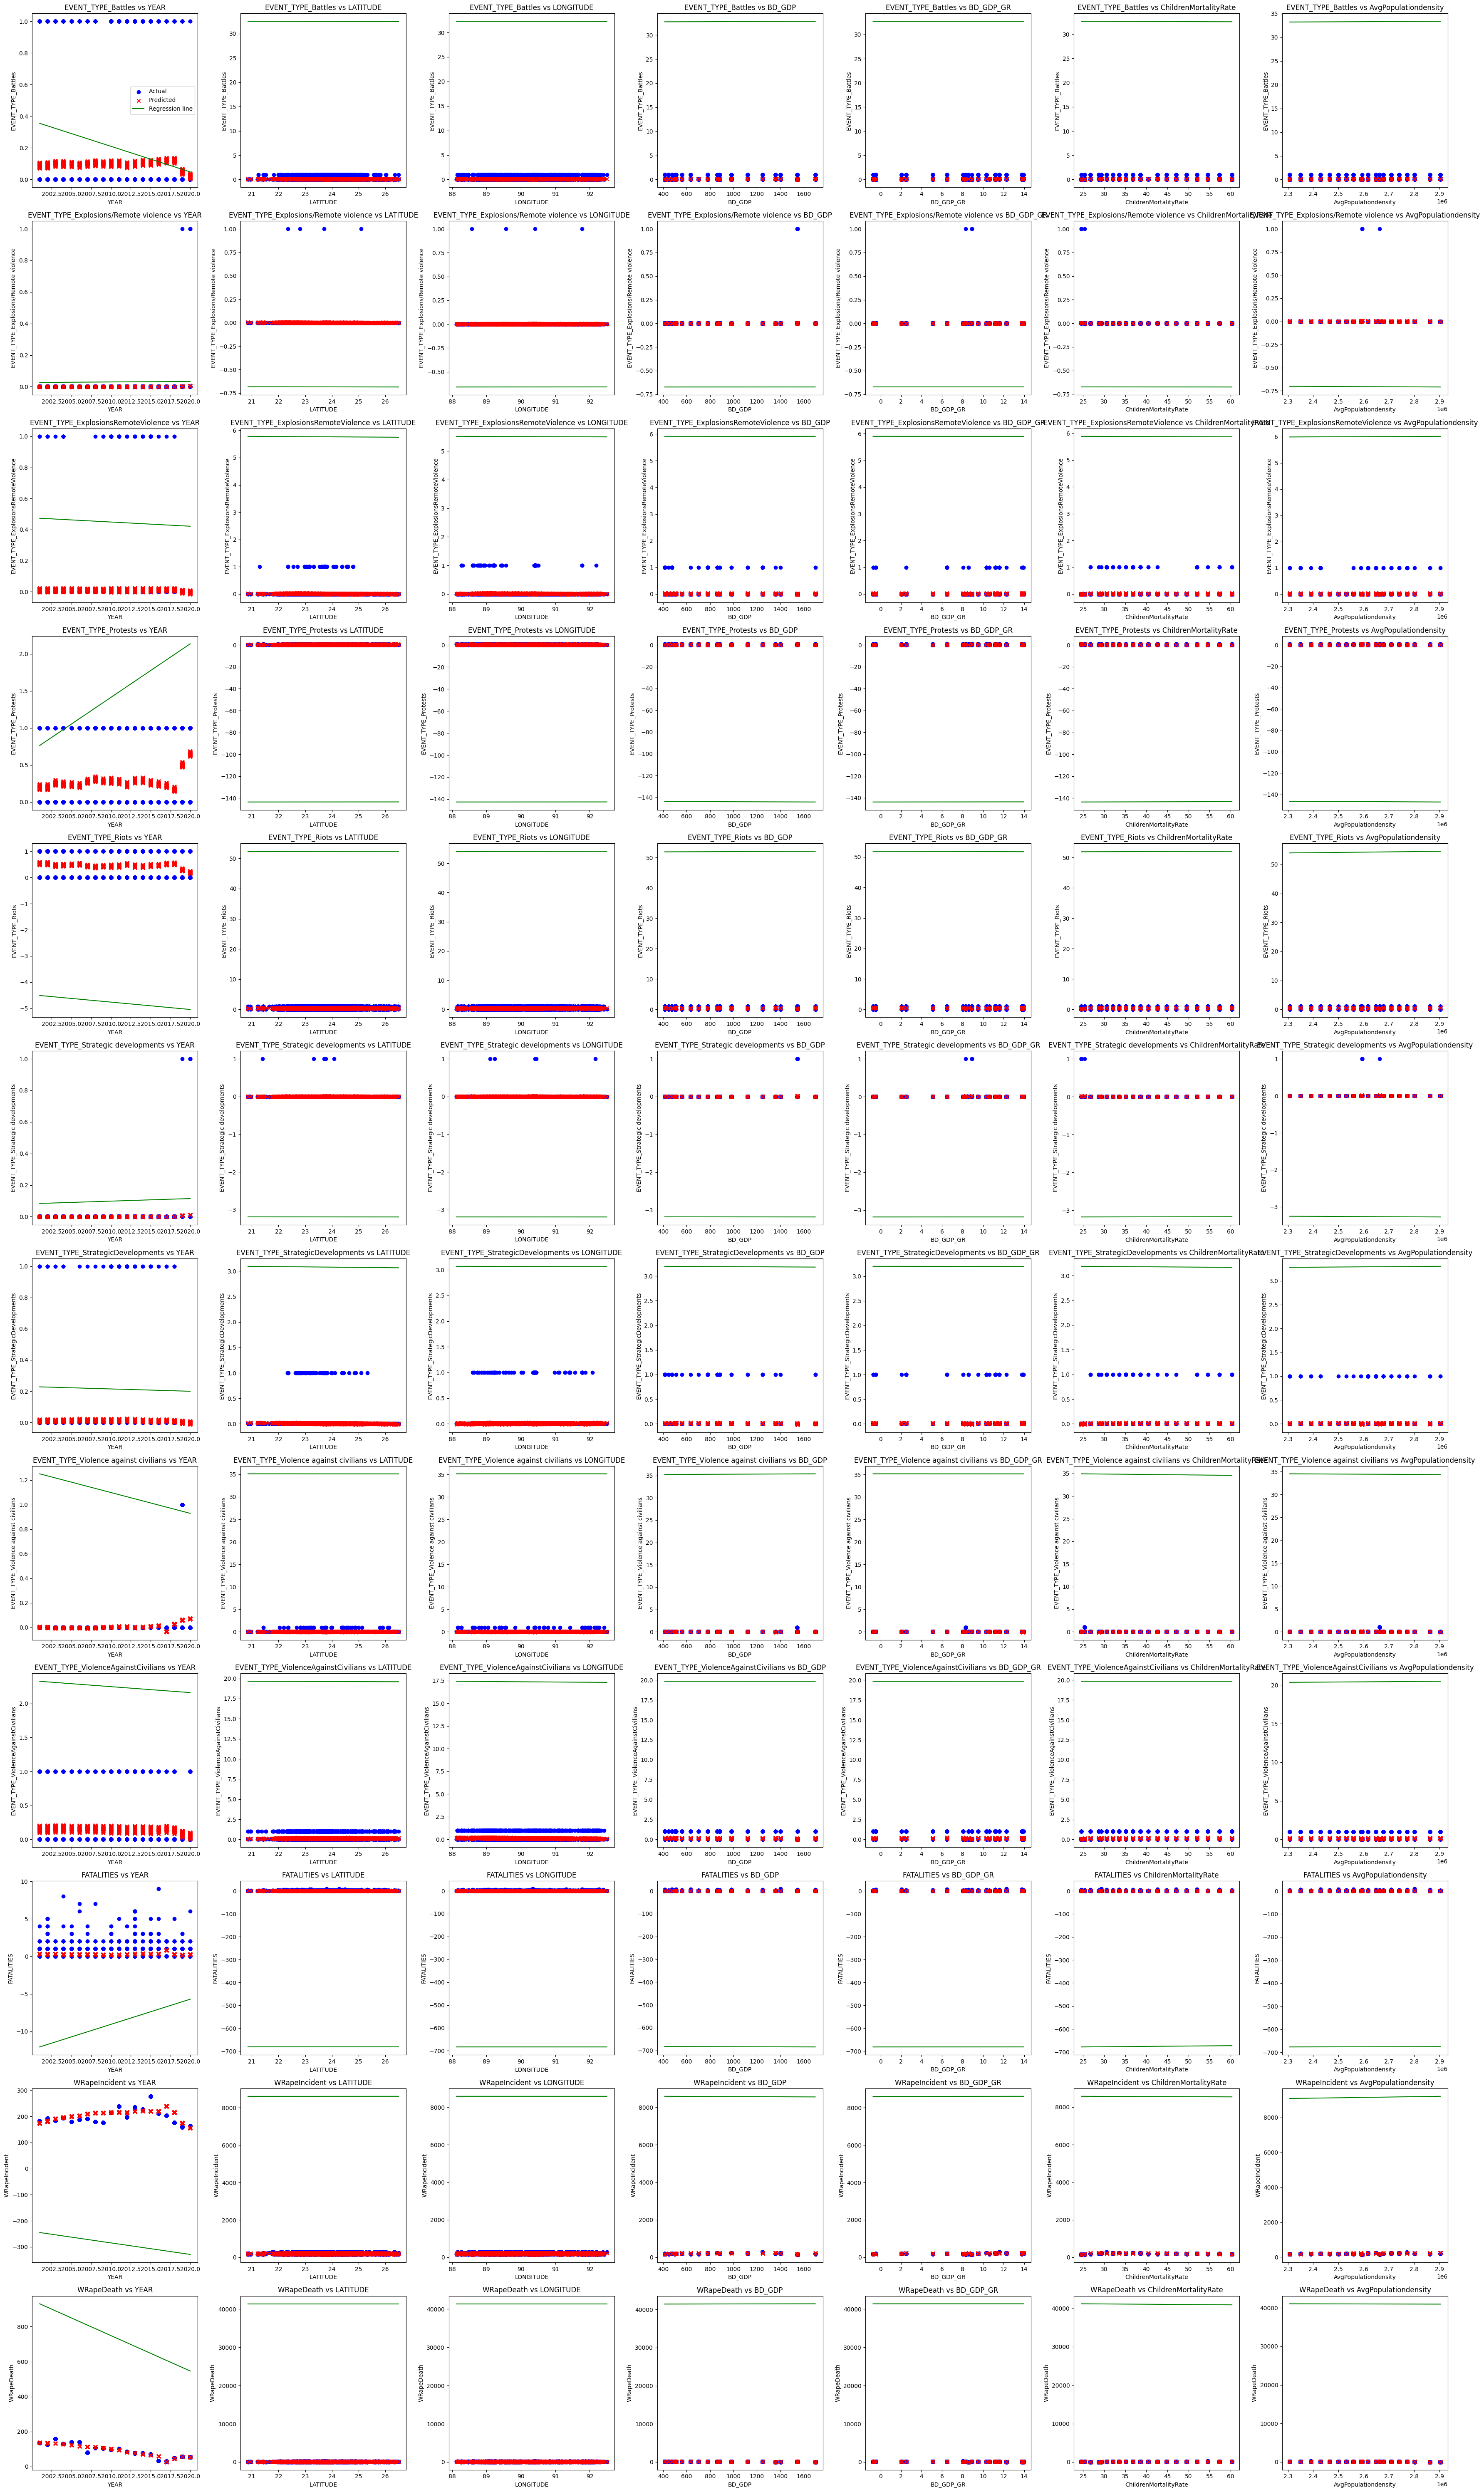

In [12]:
df = pd.read_excel(data_path1)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Define the feature columns and target columns
feature_cols = ['YEAR', 'LATITUDE', 'LONGITUDE', 'BD_GDP', 'BD_GDP_GR', 'ChildrenMortalityRate', 'AvgPopulationdensity']
target_cols = ['EVENT_TYPE', 'FATALITIES', 'WRapeIncident', 'WRapeDeath']

# Convert categorical target variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['EVENT_TYPE'])

# Update the target columns after one-hot encoding
target_cols = [col for col in df.columns if col.startswith('EVENT_TYPE_')] + ['FATALITIES', 'WRapeIncident', 'WRapeDeath']

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into features (X) and target (y)
X = df[feature_cols]
y = df[target_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Function to plot scatter plots and regression lines for all feature and target pairs
def plot_all_features_targets(X_test, y_test, y_pred, feature_cols, target_cols):
    num_features = len(feature_cols)
    num_targets = len(target_cols)
    fig, axes = plt.subplots(num_targets, num_features, figsize=(5*num_features, 5*num_targets))

    for i, target in enumerate(target_cols):
        for j, feature in enumerate(feature_cols):
            ax = axes[i, j]
            ax.scatter(X_test[feature], y_test[target], color='blue', label='Actual')
            ax.scatter(X_test[feature], y_pred[:, target_cols.index(target)], color='red', marker='x', label='Predicted')

            # Calculate the regression line
            coeff = model.coef_[target_cols.index(target)][j]
            intercept = model.intercept_[target_cols.index(target)]
            line_x = np.linspace(X_test[feature].min(), X_test[feature].max(), 100)
            line_y = coeff * line_x + intercept

            ax.plot(line_x, line_y, color='green', label='Regression line')

            ax.set_xlabel(feature)
            ax.set_ylabel(target)
            ax.set_title(f'{target} vs {feature}')
            if i == 0 and j == 0:
                ax.legend()

    plt.tight_layout()
    plt.show()

# Plotting all feature-target pairs
plot_all_features_targets(X_test, y_test, y_pred, feature_cols, target_cols)
